In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import gzip

import scanpy as sc
import episcanpy.api as epi

In [17]:
D20_ATAC_feat = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
D20_ATAC_feat = D20_ATAC_feat[D20_ATAC_feat.type == 'Peaks']

D20_ATAC_feat

,peakID,type,chr,start,end
20720,1:9781-10682,Peaks,1,9781,10682
20721,1:15771-16661,Peaks,1,15771,16661
20722,1:28909-29801,Peaks,1,28909,29801
20723,1:90831-91728,Peaks,1,90831,91728
20724,1:180669-181501,Peaks,1,180669,181501
...,...,...,...,...,...
254547,KI270713.1:21537-22450,Peaks,KI270713.1,21537,22450
254548,KI270713.1:28463-29334,Peaks,KI270713.1,28463,29334
254549,KI270713.1:31224-32111,Peaks,KI270713.1,31224,32111
254550,KI270713.1:35925-36654,Peaks,KI270713.1,35925,36654


### Load the Peak matrix

In [34]:
D20_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D20_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D20_1.obs_names = feat_name['peakID']
D20_1.var_names = barcodes

In [44]:
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D20_1_ATAC = D20_1[peak_name]
D20_1_ATAC

View of AnnData object with n_obs × n_vars = 233832 × 11457

In [69]:
#Binarize the data
print(np.max(D20_1_ATAC.X))

epi.pp.binarize(D20_1_ATAC)
print(np.max(D20_1_ATAC.X))

256.0


1.0


In [70]:
D20_1_ATAC

AnnData object with n_obs × n_vars = 233832 × 11457

In [71]:
#Basic filtering cells/genes
epi.pp.filter_cells(D20_1_ATAC, min_features=1)
epi.pp.filter_features(D20_1_ATAC, min_cells=1)

D20_1_ATAC

AnnData object with n_obs × n_vars = 233832 × 11457
    obs: 'nb_features'
    var: 'n_cells'

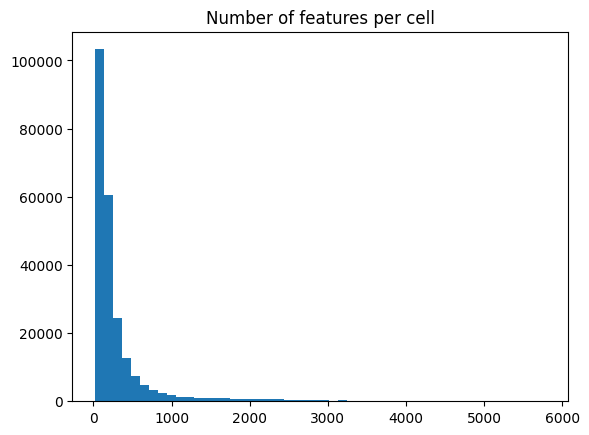

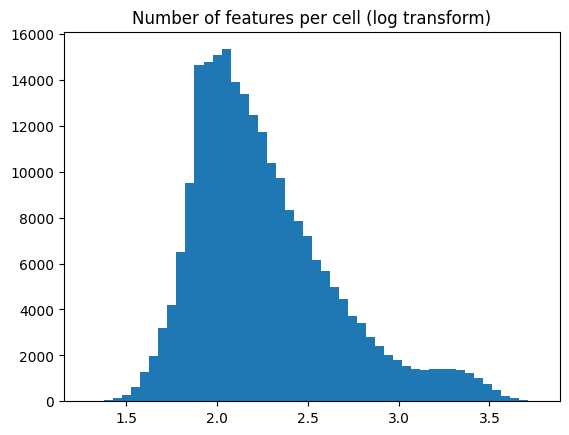

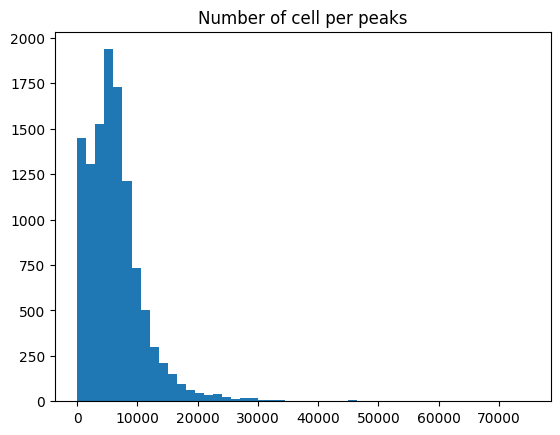

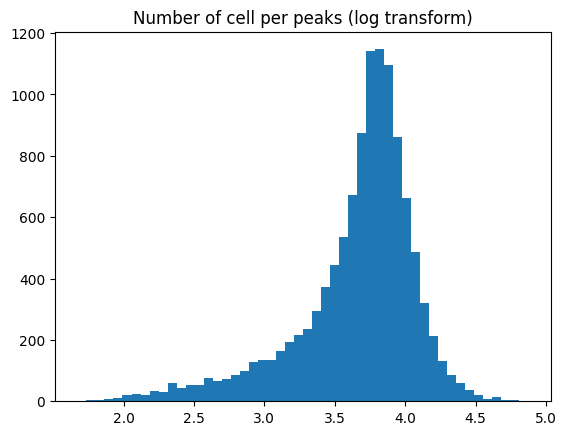

In [79]:
#Visulazation of nb_features per cell
plt.hist(D20_1_ATAC.obs.nb_features, bins=50)
plt.title("Number of features per cell")
plt.show()

plt.hist(np.log10(D20_1_ATAC.obs.nb_features), bins=50)
plt.title("Number of features per cell (log transform)")
plt.show()

#Distribution number cells per peak
plt.hist(D20_1_ATAC.var.n_cells, bins=50)
plt.title("Number of cell per peaks")
plt.show()

plt.hist(np.log10(D20_1_ATAC.var.n_cells), bins=50)
plt.title("Number of cell per peaks (log transform)")
plt.show()


In [106]:
epi.pp.lazy(D20_1_ATAC)
sc.pl.umap(D20_1_ATAC, color=['nb_features'], wspace=0.3)

#### Does ovearll chromatin accessibily change overtime???

In [80]:
D8_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D8_1.obs_names = feat_name['peakID']
D8_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D8_1_ATAC = D8_1[peak_name]

#Binarize data
epi.pp.binarize(D8_1_ATAC)
print(np.max(D8_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D8_1_ATAC, min_features=1)
epi.pp.filter_features(D8_1_ATAC, min_cells=1)

1.0


In [99]:
D8_2 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D8_2/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D8_2.obs_names = feat_name['peakID']
D8_2.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D8_2_ATAC = D8_2[peak_name]

#Binarize data
epi.pp.binarize(D8_2_ATAC)
print(np.max(D8_2_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D8_2_ATAC, min_features=1)
epi.pp.filter_features(D8_2_ATAC, min_cells=1)

1.0


In [85]:
D12_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D12_1.obs_names = feat_name['peakID']
D12_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D12_1_ATAC = D12_1[peak_name]

#Binarize data
epi.pp.binarize(D12_1_ATAC)
print(np.max(D12_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D12_1_ATAC, min_features=1)
epi.pp.filter_features(D12_1_ATAC, min_cells=1)

1.0


In [100]:
D12_2 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D12_2/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D12_2.obs_names = feat_name['peakID']
D12_2.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D12_2_ATAC = D12_2[peak_name]

#Binarize data
epi.pp.binarize(D12_2_ATAC)
print(np.max(D12_2_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D12_2_ATAC, min_features=1)
epi.pp.filter_features(D12_2_ATAC, min_cells=1)

1.0


In [88]:
D22_1 = anndata.read_mtx("../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/matrix.mtx.gz")
feat_name = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/features.tsv.gz'), sep='\t', header=None, usecols=[0,2,3,4,5], names=['peakID','name2','type','chr','start','end'])
barcodes = pd.read_csv(gzip.open('../data/initial_10x_outputs/filtered_feature_bc_matrix-D22_1/barcodes.tsv.gz'), sep='\t', header=None)
barcodes = list(barcodes[0])

D22_1.obs_names = feat_name['peakID']
D22_1.var_names = barcodes

#Only keep the ATAC features
peak_name = feat_name[feat_name.type == 'Peaks']
peak_name = list(peak_name['peakID'])

D22_1_ATAC = D22_1[peak_name]

#Binarize data
epi.pp.binarize(D22_1_ATAC)
print(np.max(D22_1_ATAC.X))

#Basic filtering cells/genes
epi.pp.filter_cells(D22_1_ATAC, min_features=1)
epi.pp.filter_features(D22_1_ATAC, min_cells=1)

1.0


#### What's the overlap of peaks accross timepoints

In [96]:
print('8-12 overlap:', len(D12_1_ATAC.obs_names.intersection(D8_1_ATAC.obs_names)))
print('8-20 overlap:', len(D20_1_ATAC.obs_names.intersection(D8_1_ATAC.obs_names)))
print('8-22 overlap:', len(D22_1_ATAC.obs_names.intersection(D8_1_ATAC.obs_names)))

print('12-20 overlap:', len(D12_1_ATAC.obs_names.intersection(D20_1_ATAC.obs_names)))
print('12-22 overlap:', len(D12_1_ATAC.obs_names.intersection(D22_1_ATAC.obs_names)))

print('20-22 overlap:', len(D20_1_ATAC.obs_names.intersection(D22_1_ATAC.obs_names)))

8-12 overlap: 64
8-20 overlap: 32
8-22 overlap: 24
12-20 overlap: 41
12-22 overlap: 27
20-22 overlap: 46


In [101]:
print('8 replicates overlap:', len(D8_1_ATAC.obs_names.intersection(D8_2_ATAC.obs_names)))
print('12 replicates overlap:', len(D12_1_ATAC.obs_names.intersection(D12_2_ATAC.obs_names)))

8 replicates overlap: 97
12 replicates overlap: 103


In [98]:
np.mean([D8_1_ATAC.n_obs, D12_1_ATAC.n_obs, D20_1_ATAC.n_obs, D22_1_ATAC.n_obs])

215933.75